In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
inspector = inspect(engine)
tables = inspector.get_table_names()
tables

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).first()[0]
# Fetching the result
most_recent_date

'2017-08-23'

In [18]:
# Fetching the date exactly 1 year prior to the most recent data
one_year_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)
one_year_date

datetime.datetime(2016, 8, 23, 0, 0)

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
# Perform a query to retrieve the data and precipitation scores

data_year = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_date).all()
data_year

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

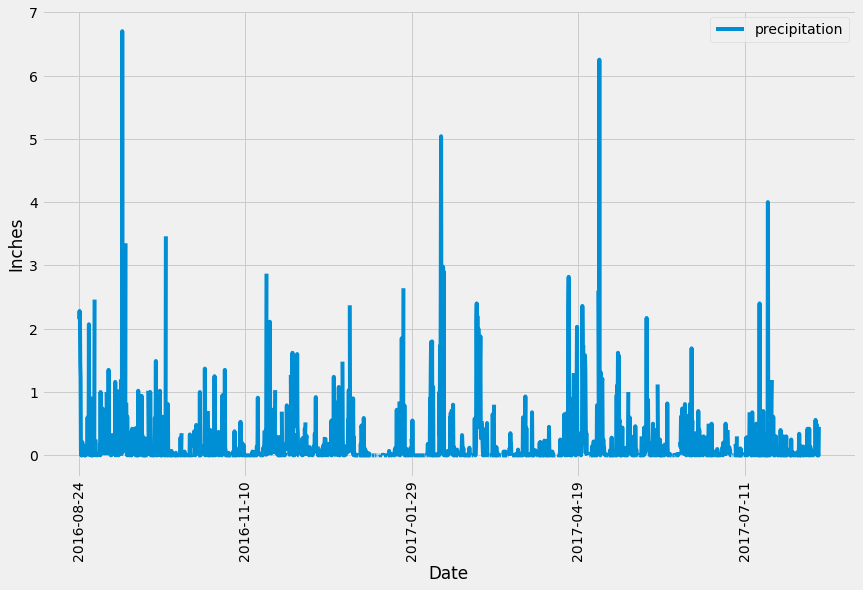

In [21]:
# Save the query results as a Pandas DataFrame and set the index to the date column

data_df = pd.DataFrame(data_year, columns=['date', 'precipitation'])

# Sort the dataframe by date

data_df = data_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data

data_df.plot(x='date', y='precipitation', rot=90, figsize=(13, 8))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number stations in the dataset
stations_count = session.query(station).count()
stations_count

9

In [27]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

query = session.query(measurement.station, measurement.date).all()
stations_df = pd.DataFrame(query, columns=['station', 'frequency'])

# Grouping the retrieved data by station and sorting by activity

stations_df = stations_df.groupby(['station']).count().sort_values('frequency', ascending=False )
stations_df

,frequency
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

query_station = stations_df.index[0]

# Creating the query using the ID of the most active station

temperatures_data = session.query(measurement.station, measurement.date, measurement.tobs).\
filter(measurement.station == query_station).all()

# Fetching the data

temperatures_data

[('USC00519281', '2010-01-01', 70.0),
 ('USC00519281', '2010-01-02', 62.0),
 ('USC00519281', '2010-01-03', 74.0),
 ('USC00519281', '2010-01-04', 75.0),
 ('USC00519281', '2010-01-05', 74.0),
 ('USC00519281', '2010-01-06', 76.0),
 ('USC00519281', '2010-01-07', 69.0),
 ('USC00519281', '2010-01-08', 66.0),
 ('USC00519281', '2010-01-09', 70.0),
 ('USC00519281', '2010-01-10', 75.0),
 ('USC00519281', '2010-01-11', 64.0),
 ('USC00519281', '2010-01-12', 60.0),
 ('USC00519281', '2010-01-13', 61.0),
 ('USC00519281', '2010-01-14', 68.0),
 ('USC00519281', '2010-01-15', 64.0),
 ('USC00519281', '2010-01-16', 66.0),
 ('USC00519281', '2010-01-17', 67.0),
 ('USC00519281', '2010-01-18', 70.0),
 ('USC00519281', '2010-01-19', 67.0),
 ('USC00519281', '2010-01-20', 67.0),
 ('USC00519281', '2010-01-21', 69.0),
 ('USC00519281', '2010-01-22', 60.0),
 ('USC00519281', '2010-01-23', 75.0),
 ('USC00519281', '2010-01-24', 75.0),
 ('USC00519281', '2010-01-25', 65.0),
 ('USC00519281', '2010-01-26', 75.0),
 ('USC005192

In [31]:
# Calculating the lowest, highest, and average temperature

temperatures_df = pd.DataFrame(temperatures_data, columns=['station', 'date', 'tobs'])
temperatures_df

,station,date,tobs
0,USC00519281,2010-01-01,70.0
1,USC00519281,2010-01-02,62.0
2,USC00519281,2010-01-03,74.0
3,USC00519281,2010-01-04,75.0
4,USC00519281,2010-01-05,74.0
...,...,...,...
2767,USC00519281,2017-08-14,77.0
2768,USC00519281,2017-08-15,77.0
2769,USC00519281,2017-08-16,76.0
2770,USC00519281,2017-08-17,76.0


In [37]:
# Calculating min, max and mean temperatures:

min_temp = temperatures_df['tobs'].min()
max_temp = temperatures_df['tobs'].max()
avg_temp = temperatures_df['tobs'].mean()

# Printing findings

print("Min, Max and Average temperatures at the most active station in the data:")
print(f"Minimum temperature: {min_temp}")
print(f"Maximum temperature: {max_temp}")
print(f"Average temperature: {avg_temp}")

Min, Max and Average temperatures at the most active station in the data:
Minimum temperature: 54.0
Maximum temperature: 85.0
Average temperature: 71.66378066378067


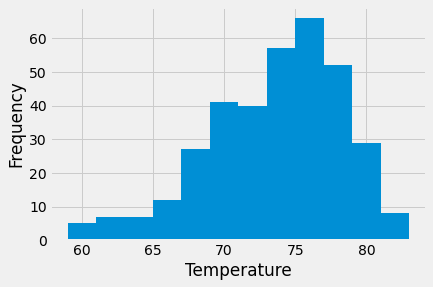

In [43]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

one_year_temp = dt.datetime.strftime(one_year_date, '%Y-%m-%d')

# Fetching the temperature data for the last year of the most active station

plot_data = temperatures_df.loc[(temperatures_df.date > one_year_temp)]

# Ploting the data

plt.hist(plot_data['tobs'].tolist(), bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close session

In [44]:
# Close Session
session.close()